### Exploring correspondence between station ID, station name and location

The station information that we are using is provided as a snapshot from early 2023, but the station information associated with rides spans 2017-2022. Performing spatial analysis across the whole time period without extensive preprocessing requires that station IDs refer to the same location across the whole time period.

In [1]:
setwd("../")

In [2]:
library(tidyverse)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────

Load in both the preprocessed ride data and the station data to compare their station encoding

In [3]:
data_all_years <- read_csv("./Data/data_all_years.csv")

Rows: 16961551 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Start.Station.Name, End.Station.Name, User.Type
dbl  (5): Trip.Id, Trip.Duration, Start.Station.Id, End.Station.Id, Bike.Id
dttm (2): Start.Time, End.Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
stations <- read_csv("./Data/stations/station_information.csv")

Rows: 661 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): name, physical_configuration, address, obcn, post_code, cross_street
dbl (6): station_id, lat, lon, altitude, capacity, nearby_distance
lgl (5): is_charging_station, rental_methods, groups, _ride_code_support, is...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Do all station names used in the ride data across the whole period appear in the station information file? The answer is almost certainly no, as so much about the encoding changed between 2017 and 2022, but it is important to check.

In [15]:
length(unique(data_all_years$Start.Station.Name))

[1] 817

In [17]:
data_all_years %>% drop_na(Start.Station.Name) %>% filter(!(Start.Station.Name %in% stations$name)) %>%
distinct(Start.Station.Name)

Start.Station.Name
<chr>
Queen St W / James St
Queen St W / York St (City Hall)
Marlborough Ave / Yonge St
College Park- Gerrard Entrance
200 Bloor St. E.
East Liberty St / Pirandello St
Bay St / Charles St - SMART
Roehampton Ave / Yonge St
King St W / Charlotte St (West)


There are more unique station names in the ride data than entries in the station information data, and many (286) station names appearing in the ride data that do not appear in the station information data. This could be due to the station name formatting differing between ride data and station information data or the stations no longer being part of the network.

To check whether stations have been removed from the network, station IDs can be used instead of station names.

In [45]:
data_all_years %>% drop_na(Start.Station.Id) %>% filter(!(Start.Station.Id %in% stations$station_id)) %>%
distinct(Start.Station.Id)

Start.Station.Id
<dbl>
7275
7134
7177
7017
7051
7167
7382
7019
7060


Some station IDs appearing in the ride data are not represented in the station information data, but only 58 of the 286. These station IDs must have been taken out of service by 2022. This means there are over 200 station names that are not represented in the station information data but are associated with IDs that are.

Are these simply name format changes or are station IDs actually being rotated through different stations in some way?

In [13]:
data_all_years %>% drop_na(Start.Station.Name, Start.Station.Id) %>% group_by(Start.Station.Id) %>%
summarize(unique_station_names = length(unique(Start.Station.Name))) %>%
filter(unique_station_names > 1)

Start.Station.Id,unique_station_names
<dbl>,<int>
7000,2
7001,2
7002,2
7005,2
7007,2
7017,2
7019,2
7023,2
7027,2


Whether through changes in formatting or changes in the actual station associated with the ID, there are many (163) station IDs that have more than 1 distinct station name associated with them in the ride data. Plotting the distribution shows that this is a pervasive problem, with some station IDs having as many as 5 or 7 distinct names associated with them (though 2 or 3 are more common).

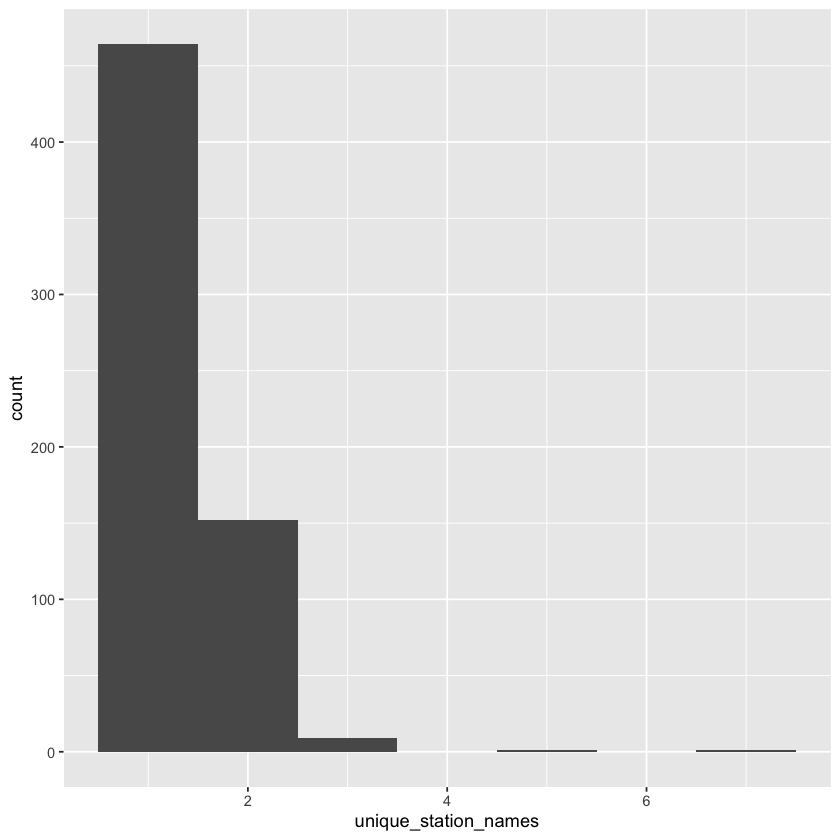

In [20]:
data_all_years %>% drop_na(Start.Station.Name, Start.Station.Id) %>% group_by(Start.Station.Id) %>%
summarize(unique_station_names = length(unique(Start.Station.Name))) %>%
ggplot(aes(x = unique_station_names)) +
       geom_histogram(binwidth = 1)

Checking for the number of station IDs associated with a given station name is less informative, because any changes in station name formatting may obscure the use of multiple IDs for the same station location. Nevertheless, even a single appearance of this issue suggests that the same station may have multiple IDs associated with it over the years, which is important to know.

In [21]:
data_all_years %>% drop_na(Start.Station.Name, Start.Station.Id) %>% group_by(Start.Station.Name) %>%
summarize(unique_station_ids = length(unique(Start.Station.Id))) %>% filter(unique_station_ids > 1)

Start.Station.Name,unique_station_ids
<chr>,<int>
Princes Gate / Nunavut Dr,2


In this instance, it appears that multiple IDs associated with the same exact station name is not a serious problem with only a single example.

In [23]:
data_all_years %>% filter(Start.Station.Name == "Princes Gate / Nunavut Dr") %>% group_by(Start.Station.Id) %>% count()

Start.Station.Id,n
<dbl>,<int>
7510,8985
7680,2997


Nevertheless, as emphasized above, changes in station name formatting are very likely to obscure other instances of ID changes for the same station location. The best way to determine whether this is happening is to manually inspect the different station names assoicated with a given ID.

Having determined that there are serious inconsistencies with the use of station IDs over the period from 2017-2022, with the same station location being associated with multiple IDs and the same ID being recycled for use with distinctly different station locations, there are three main approaches:

1. Use the data as-is, accepting that there will be location inaccuracies associated with rides
2. Determine whether the station ID-name-location mapping is relatively accurate for more recent rides, corresponding to the fact that the station information dates from close to the end of the ride data
3. Work to reconstruct the lat-long locations of stations which do not directly correspond to station ID-name mapping in the station information data using a combination of manual and automated approaches.

Option 2 represents an intermediate in that it is relatively simple to test and may have high rewards in terms of providing multiple years of data to use for spatial analysis purposes without significant time cost. 

A quick check to see whether station name and ID in the station information data match that in the ride data for a particular time period is to anti-join the two datasets on station name and ID to locate rides where the station name/ID pair is not found in the station information data, and then count by year. Removing NAs, there is no evidence that recent years contain fewer mismatches. The reason behind the mismatches may differ by year however.

In [37]:
anti_join(data_all_years, stations, by = join_by(Start.Station.Id == station_id, Start.Station.Name == name)) %>%
drop_na(Start.Station.Name, Start.Station.Id) %>% group_by(year(Start.Time)) %>% count()

year(Start.Time),n
<dbl>,<int>
2017,177012
2018,420385
2019,477169
2020,577051
2021,593266
2022,542199


The 2022 ride data should have the best match with station information because it was sourced shortly after the year finished, limiting time for changes in station ID/name. Checking which stations are producing mismatches in 2022 may show the reason for the mistmatches more clearly.

In [42]:
anti_join(data_all_years, stations, by = join_by(Start.Station.Id == station_id, Start.Station.Name == name)) %>%
drop_na(Start.Station.Id, Start.Station.Name) %>% filter(year(Start.Time) == 2022) %>% distinct(Start.Station.Id) %>%
left_join(data_all_years) %>% select(Start.Station.Id, Start.Station.Name) %>% distinct() %>%
left_join(stations, by = join_by(Start.Station.Id == station_id)) %>%
select(Start.Station.Id, Start.Station.Name, name, address)

Joining with `by = join_by(Start.Station.Id)`
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): input string 2 is invalid in this locale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), err

Start.Station.Id,Start.Station.Name,name,address
<dbl>,<chr>,<chr>,<chr>
7334,Simcoe St / Wellington St North,Simcoe St / Wellington St W North,Simcoe St / Wellington St 2
7113,Parliament St / Aberdeen Ave,NA,NA
7171,Ontario Place Blvd / Lake Shore Blvd W (East),Ontario Place Blvd / Lake Shore Blvd W,Ontario Place Blvd / Lake Shore Blvd W
7171,Ontario Place Blvd / Lakeshore Blvd W,Ontario Place Blvd / Lake Shore Blvd W,Ontario Place Blvd / Lake Shore Blvd W
7171,Ontario Place Blvd / Remembrance Dr,Ontario Place Blvd / Lake Shore Blvd W,Ontario Place Blvd / Lake Shore Blvd W
7250,St. George St / Russell St - SMART,Ursula Franklin St / St. George St - SMART,Ursula Franklin St / St. George St
7323,457 King St. W. at Spadina,457 King St W,457 King St W.
7389,College Park- Gerrard Entrance,College Park - Gerrard Entrance,College Park- Gerrard Entrance
7398,York St / Harbour St,York St / Lake Shore Blvd W,York St / Lakeshore St W - South


Scanning the table above reveals that the mismatches between ride data in 2022 and station information data are largely down to two reasons:

1. There are a lot of typos or subtle differences in station name formatting in both datasets, and even between name and address fields in the station information data. In some cases, when the name in the ride data does not match the name in the station information data, it matches the address in the latter, but this is not consistent. Nevertheless, in these cases it seems that the ID always refers to the correct station *location* so ID can be used to locate the station in space.
2. The station ID in the ride data is not present in the station information data (new stations?). In this case, the stations may have to be omitted from the spatial analysis in the short term. It should be possible to locate them programatically in most cases however, by fuzzy matching features they are named for to corresponding datasets available from the City of Toronto (eg. intersection data or address data).

A similar look at the 2021 data tells us that the correspondence of station ID in the ride data and station information data is much poorer before 2022 because of station IDs being reassigned to different stations. While some stations are merely mismatched due to differences in name format, others obviously changed ID during 2021. 7001 moves from Lower Jarvis and the Esplanade to Wellesley Station, 7519 from Sheridan and Dundas to 406 Oakwood Ave. and 7639 from Riverview Gardens to 135 Queen's Wharf to name just a few examples. These are not minor moves but changes that cause an ID to be associated with a new station clear across town.

In [43]:
anti_join(data_all_years, stations, by = join_by(Start.Station.Id == station_id, Start.Station.Name == name)) %>%
drop_na(Start.Station.Id, Start.Station.Name) %>% filter(year(Start.Time) == 2021) %>% distinct(Start.Station.Id) %>%
left_join(data_all_years) %>% select(Start.Station.Id, Start.Station.Name) %>% distinct() %>%
left_join(stations, by = join_by(Start.Station.Id == station_id)) %>%
select(Start.Station.Id, Start.Station.Name, name, address)

Joining with `by = join_by(Start.Station.Id)`


Start.Station.Id,Start.Station.Name,name,address
<dbl>,<chr>,<chr>,<chr>
7562,Priscilla Ave / Dundas St W - SMART,Priscilla Ave / Dundas St W,Priscilla Ave / Dundas St W
7562,Priscilla Ave / Dundas St W,Priscilla Ave / Dundas St W,Priscilla Ave / Dundas St W
7528,Spadina Rd / Austin Terrace - SMART,Spadina Rd / Austin Terrace,Spadina Rd / Austin Terrace
7528,Spadina Rd / Austin Terrace,Spadina Rd / Austin Terrace,Spadina Rd / Austin Terrace
7476,Symington Ave / Dupont St - SMART,Symington Ave / Dupont St,Symington Ave / Dupont St - SMART
7476,Symington Ave / Dupont St,Symington Ave / Dupont St,Symington Ave / Dupont St - SMART
7448,Goodwood Park Ct / Dentonia Park - SMART,Goodwood Park Ct / Dentonia Park,Goodwood Park Ct / Dentonia Park
7448,Goodwood Park Ct / Dentonia Park,Goodwood Park Ct / Dentonia Park,Goodwood Park Ct / Dentonia Park
7593,Roehampton St / Bayview Ave - SMART,Roehampton St / Bayview Ave,Roehampton St / Bayview Ave


Ideally, there should be some way to resolve when station IDs have been resassigned and to use supplementary data to create a database that matches station ID with location as a function of date. However, for now the easiest route forward is to use only the 2022 data for subsequent analysis and use supplementary data only to attempt to fill in the location of any station IDs which are not represented in the station information data.